In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [35]:
PATH = './data/data_without_na_01.xlsx'
df = pd.read_excel(PATH)
df.shape

(3629, 28)

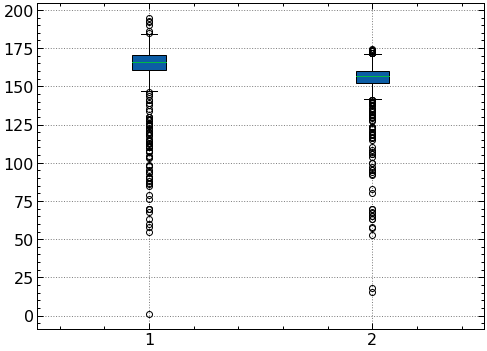

In [16]:
with plt.style.context(['science','grid','notebook']):
    plt.boxplot([height_male,height_female],patch_artist=True)
    plt.show()

In [36]:
def data_describe(df):
    data_desc = {}
    total_patient = 0
    df_group = df.filter(['手术ID','姓名','性别','年龄','体重','身高','病区'])
    for department,group_by_department in df_group.groupby('病区'):
        data_desc[department] = {}
        for sex,group_by_sex in group_by_department.groupby('性别'):
            data_desc[department][sex] = {}
            data_desc[department][sex]['total'] = group_by_sex.shape[0]
            total_patient += group_by_sex.shape[0]
            for item in ['年龄','体重','身高']:
                data_desc[department][sex][item] = {}
                data_desc[department][sex][item]['max'] = group_by_sex[item].max().round(1)
                data_desc[department][sex][item]['avg'] = group_by_sex[item].mean().round(1)
                data_desc[department][sex][item]['min'] = group_by_sex[item].min().round(1)

#     pprint(data_desc)
    pprint('总人数：'+str(total_patient))
    return data_desc

In [37]:
data_describe(df)

'总人数：3629'


{'口腔科病区': {'女': {'total': 34,
   '年龄': {'max': 72, 'avg': 41.5, 'min': 3},
   '体重': {'max': 80.6, 'avg': 57.8, 'min': 44.0},
   '身高': {'max': 167.0, 'avg': 153.1, 'min': 105.5}},
  '男': {'total': 56,
   '年龄': {'max': 83, 'avg': 40.4, 'min': 9},
   '体重': {'max': 88.6, 'avg': 63.8, 'min': 37.4},
   '身高': {'max': 181.5, 'avg': 165.5, 'min': 141.0}}},
 '妇产科病区': {'女': {'total': 599,
   '年龄': {'max': 88, 'avg': 37.0, 'min': 15},
   '体重': {'max': 165.0, 'avg': 64.0, 'min': 33.2},
   '身高': {'max': 174.5, 'avg': 157.1, 'min': 15.4}}},
 '心血管病区': {'女': {'total': 198,
   '年龄': {'max': 75, 'avg': 43.9, 'min': 0},
   '体重': {'max': 81.0, 'avg': 50.7, 'min': 6.0},
   '身高': {'max': 172.0, 'avg': 148.9, 'min': 63.0}},
  '男': {'total': 165,
   '年龄': {'max': 83, 'avg': 48.1, 'min': 1},
   '体重': {'max': 95.0, 'avg': 61.4, 'min': 10.0},
   '身高': {'max': 190.0, 'avg': 161.2, 'min': 76.0}}},
 '整形外科病区': {'女': {'total': 14,
   '年龄': {'max': 63, 'avg': 28.0, 'min': 3},
   '体重': {'max': 62.7, 'avg': 50.3, 'min': 

In [32]:
def handle_data():
    df = pd.read_excel('./data/data_without_na.xlsx')
    df.loc[df['病区'] == '妇产科门诊','病区'] = '妇产科病区'
    df.loc[df['病区'] == '心血管内科K病区','病区'] = '心血管病区'
    df.loc[df['病区'] == '心血管内科病区','病区'] = '心血管病区'
    df.loc[df['病区'] == '心血管外科病区','病区'] = '心血管病区'
    df.loc[df['病区'] == '泌尿外科中心K病区','病区'] = '泌尿外科中心病区'
    df.loc[df['病区'] == '神经内科K病区','病区'] = '神经内科病区'
    
    df.drop(df[df['病区'] == '血液科病区'].index,inplace = True)
    df.drop(df[df['病区'] == '血液科K病区'].index,inplace = True)
    df.drop(df[df['病区'] == '肾内科病区'].index,inplace = True)
    df.drop(df[df['病区'] == '消化内科病区'].index,inplace = True)
    
    df.to_excel('./data/data_without_na_01.xlsx')
    data_describe(df)

In [40]:
# 得到每个科室的男女分布
def get_sex(df):
    ans = {
        '男':[],
        '女':[],
        '科室':[]
    }
    df_group = df.filter(['手术ID','姓名','性别','年龄','体重','身高','病区'])
    for department,group_by_department in df_group.groupby('病区'):
        ans['科室'].append(department)
        ans['男'].append(group_by_department[group_by_department['性别'] == '男'].shape[0])
        ans['女'].append(group_by_department[group_by_department['性别'] == '女'].shape[0])
    return ans

In [42]:
department_sex = get_sex(df)

In [50]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

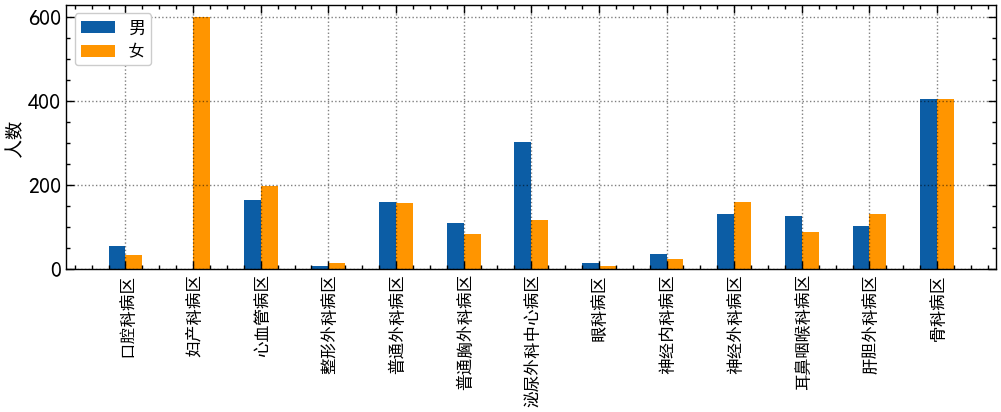

In [57]:
xg = list(range(0,26,2))
xl = [x-0.5 for x in xg]
xr = [x for x in xg]

with plt.style.context(['science','grid','notebook']):
    fig = plt.figure(figsize=(12,3.5),dpi=100)
#     plt.ylim([0,1])
    plt.bar(xl,department_sex['男'],width=0.5,label='男',align='edge')
    plt.bar(xr,department_sex['女'],width=0.5,label='女',align='edge',color='#ff9500')
    
    plt.ylabel('人数',fontdict={'size':14})
    plt.xticks(list(range(0,26,2)),department_sex['科室'],size="12",rotation=90)
#     plt.xlabel(r'$Consumer\ Focus$',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
#     plt.axis('tight')
#     plt.savefig('./chart/perplexity.jpg')
    plt.show()

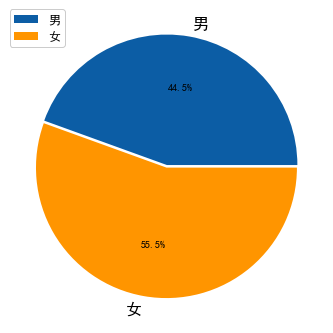

In [67]:
male = df[df['性别'] == '男'].shape[0]
female = df[df['性别'] == '女'].shape[0]
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(6,6))#将画布设定为正方形，则绘制的饼图是正圆
    label=['男','女']#定义饼图的标签，标签是列表
    explode=[0.01,0.01]#设定各项距离圆心n个半径
    plt.pie([male,female],explode=explode,labels=label,autopct='%1.1f%%',colors=['#0c5da5','#ff9500'])#绘制饼图
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()

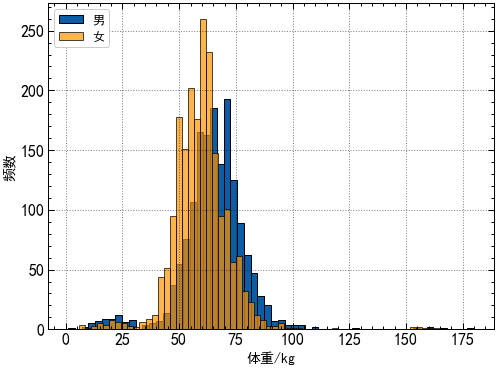

In [83]:
weight_male = df.loc[df['性别'] == '男','体重']
weight_female = df.loc[df['性别'] == '女','体重']
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(8,6))
    plt.hist(weight_male, bins=60, density=False,edgecolor="black",label='男')
    plt.hist(weight_female, bins=60, density=False,edgecolor="black",color='#ff9500',label='女',alpha=0.7)
    
    plt.ylabel('频数',fontdict={'size':14})
    plt.xlabel('体重/kg',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()

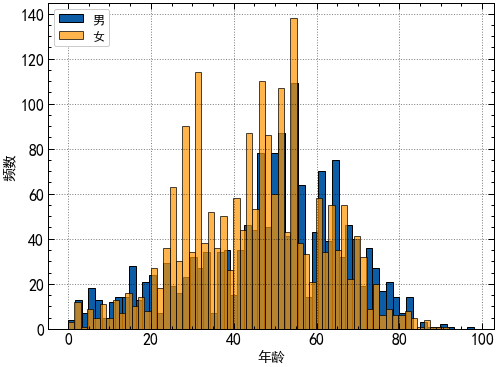

In [84]:
age_male = df.loc[df['性别'] == '男','年龄']
age_female = df.loc[df['性别'] == '女','年龄']
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(8,6))
    plt.hist(age_male, bins=60, density=False,edgecolor="black",label='男')
    plt.hist(age_female, bins=60, density=False,edgecolor="black",color='#ff9500',label='女',alpha=0.7)
    
    plt.ylabel('频数',fontdict={'size':14})
    plt.xlabel('年龄',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()

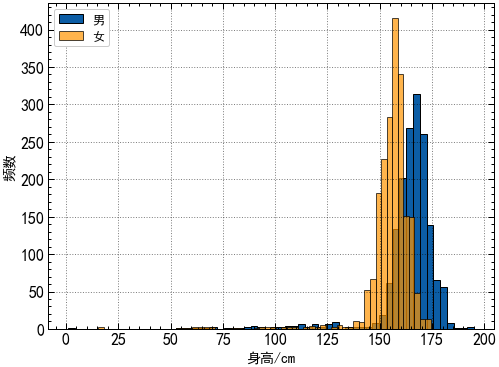

In [85]:
height_male = df.loc[df['性别'] == '男','身高']
height_female = df.loc[df['性别'] == '女','身高']
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(8,6))
    plt.hist(height_male, bins=60, density=False,edgecolor="black",label='男')
    plt.hist(height_female, bins=60, density=False,edgecolor="black",color='#ff9500',label='女',alpha=0.7)
    
    plt.ylabel('频数',fontdict={'size':14})
    plt.xlabel('身高/cm',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()